In [1]:
from matplotlib import pyplot as plt
from services import reader, identifier, solver, drawer, utils
from cv2 import cv2

In [82]:
# import importlib
# importlib.reload(reader)
file_path = 'inputs/1.jpg'
image = reader.read(file_path)
proc_image = reader.process_image(image)

In [60]:
#process all inputs and save to file
# inputs = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg']
# for input in inputs:
#     img = reader.read_and_process('inputs/%s' % input)
#     cv2.imwrite('inputs/proc/%s' % input, img)

In [125]:
# import importlib
# importlib.reload(identifier)
stations = identifier.identify_countors(proc_image)
utils.print_table(stations, hide_columns=['contour'])

|   index | type     | pos          | centroid     | size     |
|---------|----------|--------------|--------------|----------|
|       0 | circle   | (1235, 1105) | (1253, 1122) | (37, 36) |
|       1 | circle   | (1741, 1066) | (1758, 1083) | (37, 36) |
|       2 | rhombus  | (1040, 1065) | (1058, 1083) | (38, 38) |
|       3 | circle   | (1858, 988)  | (1875, 1005) | (36, 36) |
|       4 | droplet  | (1158, 987)  | (1175, 1006) | (36, 34) |
|       5 | circle   | (1430, 949)  | (1447, 966)  | (36, 36) |
|       6 | cross    | (1662, 947)  | (1680, 966)  | (39, 40) |
|       7 | pentagon | (1275, 909)  | (1291, 927)  | (35, 35) |
|       8 | star     | (1544, 868)  | (1564, 888)  | (42, 39) |
|       9 | circle   | (1002, 793)  | (1019, 810)  | (36, 36) |
|      10 | triangle | (1778, 755)  | (1797, 776)  | (40, 34) |
|      11 | circle   | (1158, 715)  | (1175, 732)  | (36, 37) |
|      12 | square   | (887, 639)   | (902, 655)   | (32, 33) |
|      13 | circle   | (1547, 637)  | (1

In [84]:
# import importlib
# importlib.reload(identifier)
rivers = identifier.identify_rivers(image)

In [133]:
import importlib
importlib.reload(solver)

configs = {
    'lines': 3,
    'locomotives': 4,
    'carriages': 1,
    'bridges': 3
}

routes = solver.solve(stations, rivers, configs)
utils.print_table(routes)

|   index |   vehicle_index | route                                |
|---------|-----------------|--------------------------------------|
|       0 |               0 | [20, 25, 26, 27, 29, 30, 31, 28, 22] |
|       1 |               1 | [20, 11, 9, 2, 4, 0, 5, 7, 14]       |
|       2 |               2 | [20, 21, 23, 32, 24, 19, 17, 12, 16] |
|       3 |               3 | [20, 8, 6, 1, 3, 10, 15, 13, 18]     |


In [134]:
# import importlib
# importlib.reload(drawer)
results = drawer.draw_results(proc_image, stations, rivers, routes)

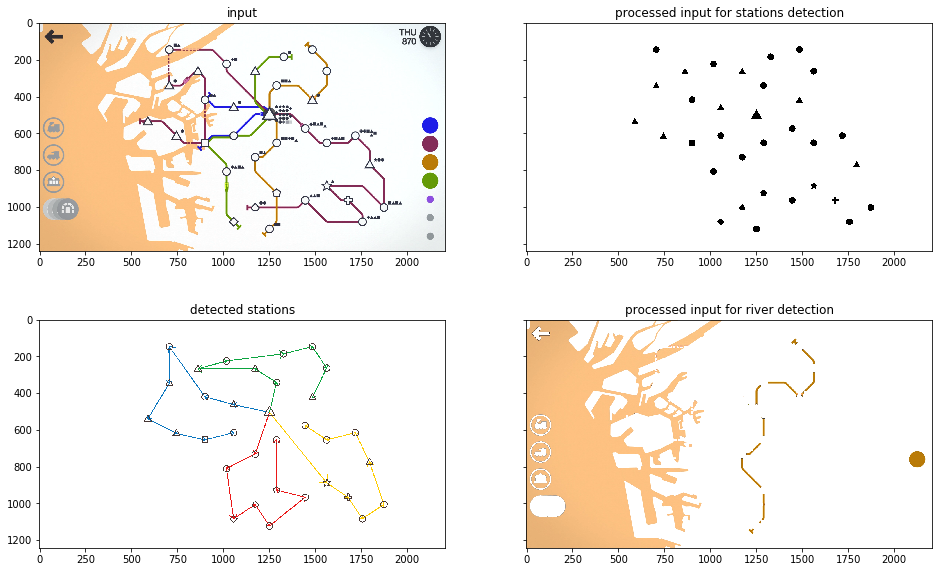

In [135]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10), sharey=True)

ax[0, 0].set_title('input')
ax[0, 0].imshow(image)

ax[0, 1].set_title('processed input for stations detection')
ax[0, 1].imshow(proc_image)

ax[1, 0].set_title('detected stations')
ax[1, 0].imshow(results)

ax[1, 1].set_title('processed input for river detection')
ax[1, 1].imshow(rivers)

#### 

In [136]:
cv2.imwrite('result.jpg', results)

True

### 